In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
df = pd.read_csv('TrainingData.csv')
X = df.iloc[:, 1].apply(lambda x: list(map(int, list(x)))).tolist()
y = df.iloc[:, 2]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
df.head()

,BID,Bitstream,class
0,0,1000111010111101101100110111001111001000101111...,1
1,1,1101111100101011111111101101010001110110000010...,1
2,2,0011001010001010100100011101000111110100101111...,0
3,3,1101010110000110100001001100111101000000110001...,1
4,4,1010111100001001000101010010111010011101001100...,1


In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)
lr_accuracy = accuracy_score(y_test, y_pred)
print(f'Logistic Regression Accuracy: {lr_accuracy}')

Logistic Regression Accuracy: 0.5375


C:\Users\avira\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [4]:
from sklearn.svm import SVC
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, y_pred)
print(f'SVM Accuracy: {svm_accuracy}')

SVM Accuracy: 0.535


In [5]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred)
print(f'Random Forest Accuracy: {rf_accuracy}')

Random Forest Accuracy: 0.5325


In [6]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)
knn_accuracy = accuracy_score(y_test, y_pred)
print(f'KNN Accuracy: {knn_accuracy}')

KNN Accuracy: 0.4625


In [7]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
y_pred = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, y_pred)
print(f'Decision Tree Accuracy: {dt_accuracy}')

Decision Tree Accuracy: 0.4675


In [8]:
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred = nb_model.predict(X_test)
nb_accuracy = accuracy_score(y_test, y_pred)
print(f'Naive Bayes Accuracy: {nb_accuracy}')

Naive Bayes Accuracy: 0.5525


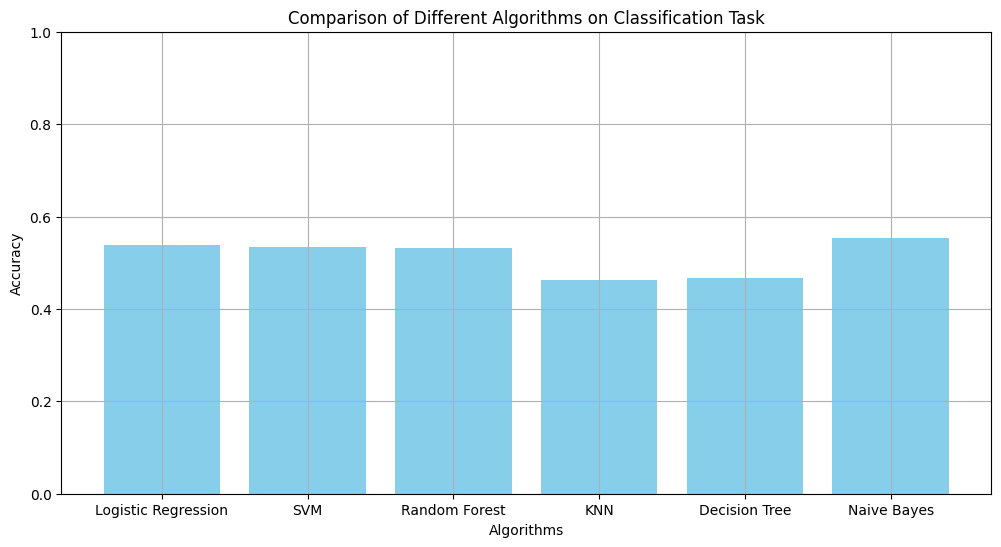

In [9]:
import matplotlib.pyplot as plt
algorithms = ['Logistic Regression', 'SVM', 'Random Forest', 'KNN', 'Decision Tree', 'Naive Bayes']
accuracies = [lr_accuracy, svm_accuracy, rf_accuracy, knn_accuracy, dt_accuracy, nb_accuracy]
plt.figure(figsize=(12, 6))
plt.bar(algorithms, accuracies, color='skyblue')
plt.xlabel('Algorithms')
plt.ylabel('Accuracy')
plt.title('Comparison of Different Algorithms on Classification Task')
plt.ylim(0, 1)
plt.grid(True)
plt.show()

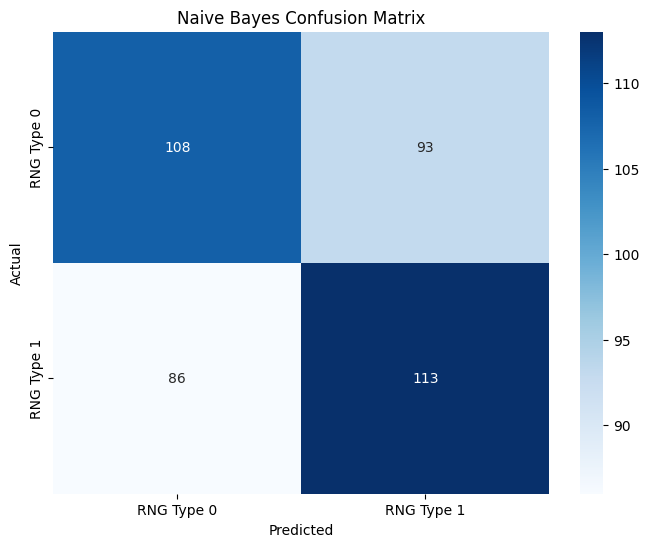

Classification Report:

              precision    recall  f1-score   support

  RNG Type 0       0.56      0.54      0.55       201
  RNG Type 1       0.55      0.57      0.56       199

    accuracy                           0.55       400
   macro avg       0.55      0.55      0.55       400
weighted avg       0.55      0.55      0.55       400



In [11]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['RNG Type 0', 'RNG Type 1'], yticklabels=['RNG Type 0', 'RNG Type 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Naive Bayes Confusion Matrix')
plt.show()

print("Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=['RNG Type 0', 'RNG Type 1']))